In [1]:
import pandas as pd
import numpy as np
import matplotlib.font_manager
import matplotlib
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

#matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

import matplotlib.pyplot as plt
import matplotlib.gridspec as pgs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition
%matplotlib inline
plt.rc('text',usetex=True)

font = {'family':'serif','size':16}  # desired use
# font = {'family':'serif','size':16, 'serif': ['computer modern roman']} 

In [2]:
from matplotlib import font_manager
font_manager.findSystemFonts(fontpaths=None, fontext="ttf");

# Les inn gögn

In [2]:
df=pd.read_csv("..//Data//TimingData//Data_for_figs_5_and_6_aws.csv")
NBand=pd.read_csv("..//Data//EnergyBands_Nanoribbon.csv",header=None,index_col=0)
RBand=pd.read_csv("..//Data//EnergyBands_Rashba.csv",header=None,index_col=0)
BandDict={'Rashba':RBand,
          'Nanoribbon':NBand}
df.columns=df.columns.str.strip()


# Plottfall

In [3]:
def plot_times(df,S,k0,k1,kticks_values,kticks_labels,E0,E1,lmethod,mmethod,rmethod,ya,yb,inset1=False,inset2=False,padding=-0.35,plot_vline=False,tunit=False):
    
    method_name_dict={"GESpert":"Perturbation\n eigenvalue method",
                      "LS":"Lopez-Sancho\n method",
                      "GESpower":"Standard\n eigenvalue method",
                      "GESpower1":"Standard\n eigenvalue method",
                      "GESstandard":"Standard\n eigenvalue method"}
    colorList=['C1','C2','C3','C4']
    etaList=[1.e-16, 1.e-15, 1.e-14, 1.e-13]

    fig,ax=plt.subplots(3,3,figsize=(8,6),sharex='col',gridspec_kw={'height_ratios': [1, 2,2]})

    #=========================================Energy band plot===================================================================
    for col in [0,1,2]:
        for name, series in BandDict[S].iteritems():
            ax[0][col].plot(series, BandDict[S].index,color='C0')
        ax[0][col].set_ylim([k0,k1])
        ax[0][col].set_yticks(kticks_values,)
        ax[0][col].set_yticklabels(kticks_labels)        
        ax[0][col].grid(True)
    ax[0][0].text(0.015,0.8,"(a)",transform=ax[0][0].transAxes)
    ax[0][1].text(0.015,0.8,"(b)",transform=ax[0][1].transAxes)
    ax[0][2].text(0.015,0.8,"(c)",transform=ax[0][2].transAxes)
    
    

    
    #=========================================Time plot===========================================================================
    sM=df['S']==S
    for (eta,c) in zip(etaList,colorList):
        eM=df['eta']==eta
        dfm=df[eM & sM ].copy()
        
        #=========================================Time scaling===============================================================
        T0_l=0.1*max([dfm["{}_Min".format(lmethod)].max(),dfm["{}_Min".format(rmethod)].max()])
        T0_m=0.1*max([dfm["{}_Min".format(mmethod)].max(),dfm["{}_Min".format(rmethod)].max()])
        T0_r=0.1*max([dfm["{}_Min".format(rmethod)].max(),dfm["{}_Min".format(rmethod)].max()])  
        T0=max([T0_l,T0_m,T0_r])
        
        #print(T0)
        if not dfm.empty:
            dfm.plot.scatter(x="E",y="{}_Min".format(lmethod),ax=ax[1][0],color=c,grid=True,zorder=10)
            dfm.plot.scatter(x="E",y="{}_FE".format(lmethod),ax=ax[2][0],logy=True,color=c,grid=True)
 
            dfm.plot.scatter(x="E",y="{}_Min".format(mmethod),ax=ax[1][1],color=c,grid=True,zorder=10)
            dfm.plot.scatter(x="E",y="{}_FE".format(mmethod),ax=ax[2][1],logy=True,color=c,grid=True)

            dfm.plot.scatter(x="E",y="{}_Min".format(rmethod),ax=ax[1][2],color=c,grid=True,zorder=10)

            dfm.plot.scatter(x="E",y="{}_FE".format(rmethod),ax=ax[2][2],logy=True,color=c,grid=True,label=r"$\eta=10^{{{eta}}}$".format(eta=int(np.log10(eta))))
            
            if inset1:
                axinset1=ax[1][0].inset_axes([0.25,0.12,0.47,0.40])
                dfm.plot.scatter(x="E",y="{}_Min".format(lmethod),ax=axinset1,color=c,grid=True)
                axinset1.set_xlim(3.4,4.5)
                axinset1.set_ylim(9.75*T0,9.95*T0)
                axinset1.set_xlabel("")
                axinset1.set_ylabel("")
                axinset1.set_xticklabels([])
                axinset1.set_yticklabels([])
                axinset1.set_xticks([])
                axinset1.set_yticks([])
                
                mark_inset(ax[1][0],axinset1,1,2,zorder=1)
                axinset2=ax[1][1].inset_axes([0.25,0.12,0.47,0.40])
                dfm.plot.scatter(x="E",y="{}_Min".format(mmethod),ax=axinset2,color=c,grid=True)
                axinset2.set_xlim(3.4,4.5)
                axinset2.set_ylim(9.75*T0,9.95*T0)
                axinset2.set_xlabel("")
                axinset2.set_ylabel("")
                axinset2.set_xticklabels([])
                axinset2.set_yticklabels([])
                axinset2.set_xticks([])
                axinset2.set_yticks([])
                mark_inset(ax[1][1],axinset2,1,2)
        
                
            if inset2:
                axinset1=ax[0][0].inset_axes([0.7,0.10,0.25,0.8])
                axinset1.axvline(1,color='C1',lw=4,snap=False)
                for name, series in BandDict[S].iteritems():
                    axinset1.plot(series, BandDict[S].index,color='C0')

                axinset1.set_xlim(0.9,1.1)
                axinset1.set_ylim(0,3.14)
                axinset1.set_xlabel("")
                axinset1.set_ylabel("")
                axinset1.set_xticklabels([])
                axinset1.set_yticklabels([])
                axinset1.set_xticks([])
                axinset1.set_yticks([])
                mark_inset(ax[0][0],axinset1,2,3)


    ax[1][0].text(0.015,0.86,"(d)",transform=ax[1][0].transAxes)
    ax[1][1].text(0.015,0.86,"(e)",transform=ax[1][1].transAxes)     
    ax[1][2].text(0.015,0.86,"(f)",transform=ax[1][2].transAxes) 
    
    T0s=dfm["{}_Min".format(mmethod)].min()
    #=========================================postprocessing plot===============================================================
    ax[1][0].set_ylim(0,1.1*10*T0)
    ax[1][1].set_ylim(0,1.1*10*T0)
    Tstep=T0s/ya
    ax[1][0].set_yticks([Tstep*i for i in range(yb)])
    ax[1][0].set_yticklabels(["{}".format(i/ya) if i%2==0 else "" for i in range(yb)])
    ax[1][1].set_yticks([Tstep*i for i in range(yb)])
    ax[1][2].set_yticks([Tstep*i for i in range(yb)])
    
    ax[0][0].set_title(method_name_dict[lmethod])
    ax[0][1].set_title(method_name_dict[mmethod])
    ax[0][2].set_title(method_name_dict[rmethod])
    ax[0][0].set_ylabel("k")
    ax[1][0].set_ylabel(r"Time [units of $T_{\mathrm{s}}$]")
    ax[2][0].set_ylim(1e-16,1e16)
    #ax[2][0].set_ylabel("Forward error")
    ax[2][0].set_ylabel("Backward error")
    ax[1][1].set_ylabel("")
    ax[2][1].set_ylabel("")
    ax[1][2].set_ylabel("")
    ax[2][2].set_ylabel("")
    ax[2][0].set_xlim(E0,E1)
    ax[2][1].set_xlim(E0,E1)
    ax[2][2].set_xlim(E0,E1)
    ax[2][0].set_xticks(list(range(E0,E1)))
    ax[2][1].set_xticks(list(range(E0,E1)))
    ax[2][2].set_xticks(list(range(E0,E1+1)))
    ax[0][1].set_yticklabels([])
    ax[0][2].set_yticklabels([])
    ax[1][1].set_yticklabels([])
    ax[1][2].set_yticklabels([])
    
    
    ax[2][0].set_yticks([1e-16,1e-10,1e-5,1e0,1e5,1e10,1e15])
    ax[2][0].set_ylim(1e-16,1e20)
    ax[2][1].set_yticks([1e-16,1e-10,1e-5,1e0,1e5,1e10,1e15])
    ax[2][1].set_ylim(1e-16,1e20)
    ax[2][1].set_yticklabels([])
    ax[2][2].set_yticks([1e-16,1e-10,1e-5,1e0,1e5,1e10,1e15])
    ax[2][2].set_ylim(1e-16,1e20)
    ax[2][2].set_yticklabels([])
    

    ax[2][0].set_xlabel("$E$ [units of $E_0$]")
    ax[2][1].set_xlabel("$E$ [units of $E_0$]")
    ax[2][2].set_xlabel("$E$ [units of $E_0$]")
    if tunit:
        ax[2][0].set_xlabel("$E$ [units of $t$]")
        ax[2][1].set_xlabel("$E$ [units of $t$]")
        ax[2][2].set_xlabel("$E$ [units of $t$]")
    
    ax[2][0].axhline(1e0,color='black',linestyle='dashed')
    ax[2][1].axhline(1e0,color='black',linestyle='dashed')
    ax[2][2].axhline(1e0,color='black',linestyle='dashed')
    h, l = ax[2][2].get_legend_handles_labels()
    ax[2][2].get_legend().remove()
    
    fig.legend(h,l,bbox_to_anchor=(0.53,-0.1), loc="lower center", 
                bbox_transform=fig.transFigure, ncol=4)
    ax[2][0].text(0.015,0.9,"(g)",transform=ax[2][0].transAxes)
    ax[2][1].text(0.015,0.9,"(h)",transform=ax[2][1].transAxes)     
    ax[2][2].text(0.015,0.9,"(i)",transform=ax[2][2].transAxes)           
    
    if plot_vline:
        ax[0][0].axvline(-1,color='C1')
        ax[0][0].axvline(1,color='C1')   
        ax[0][1].axvline(-1,color='C1')
        ax[0][1].axvline(1,color='C1') 
        ax[0][2].axvline(-1,color='C1')
        ax[0][2].axvline(1,color='C1') 
    plt.tight_layout(pad=padding)
    fig.suptitle(S+' System',fontsize=14, fontweight='bold')
    fig.subplots_adjust(top=0.85)
    plt.savefig("..//Figures//"+S+"_"+lmethod+"_"+mmethod+"_"+rmethod+".png", bbox_inches='tight',dpi=300)
    plt.savefig("..//Figures//"+S+"_"+lmethod+"_"+mmethod+"_"+rmethod+".eps", bbox_inches='tight',dpi=300)
    
    

# Plotta niðurstöður

C:\Users\gunna\AppData\Local\Temp\ipykernel_15908\3810254139.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, series in BandDict[S].iteritems():
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


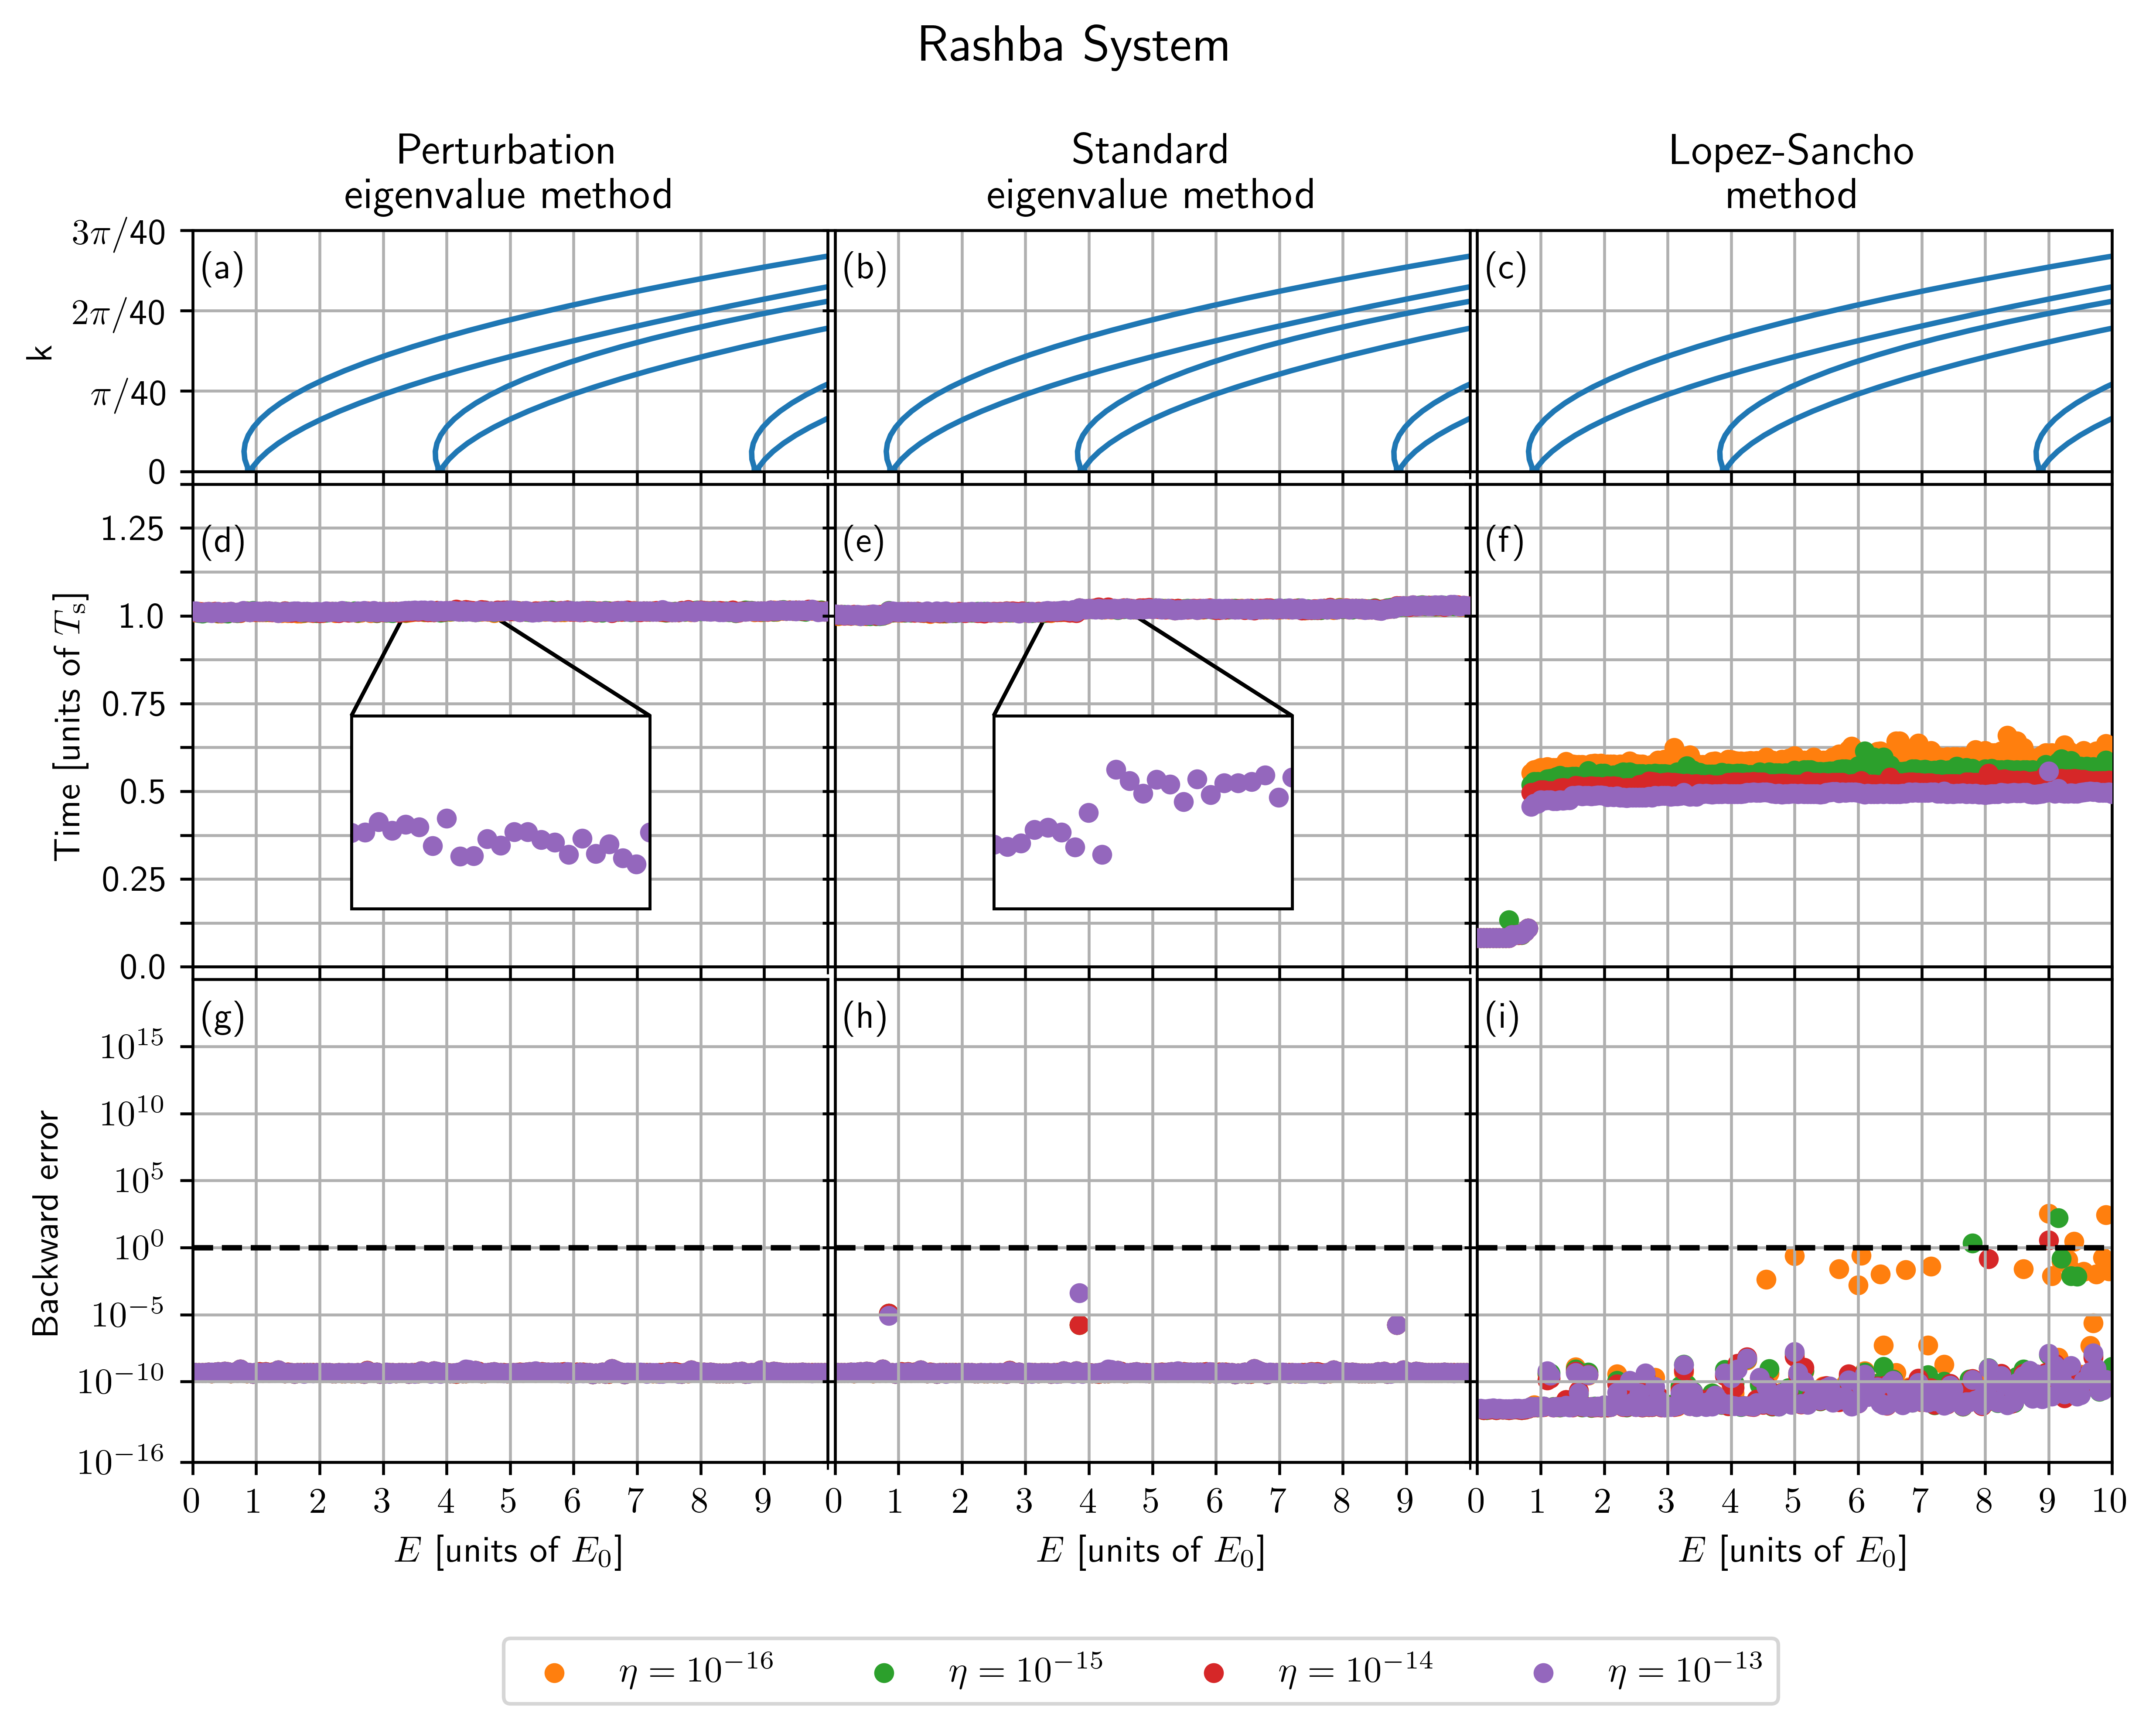

In [4]:
S='Rashba'
k0=0
kticks=[0,0.025*np.pi,0.050*np.pi,0.075*np.pi]
klabels=["0","$\pi$/40","$2\pi$/40","$3\pi$/40"]
k1=0.075*np.pi
E0=0
E1=10
N=98

lmethod="GESpert"
mmethod="GESstandard"
rmethod="LS"
plot_times(df,S,k0,k1,kticks,klabels,E0,E1,lmethod,mmethod,rmethod,8,12,True,padding=-0.15)

C:\Users\gunna\AppData\Local\Temp\ipykernel_15908\3810254139.py:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, series in BandDict[S].iteritems():
C:\Users\gunna\AppData\Local\Temp\ipykernel_15908\3810254139.py:81: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, series in BandDict[S].iteritems():
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


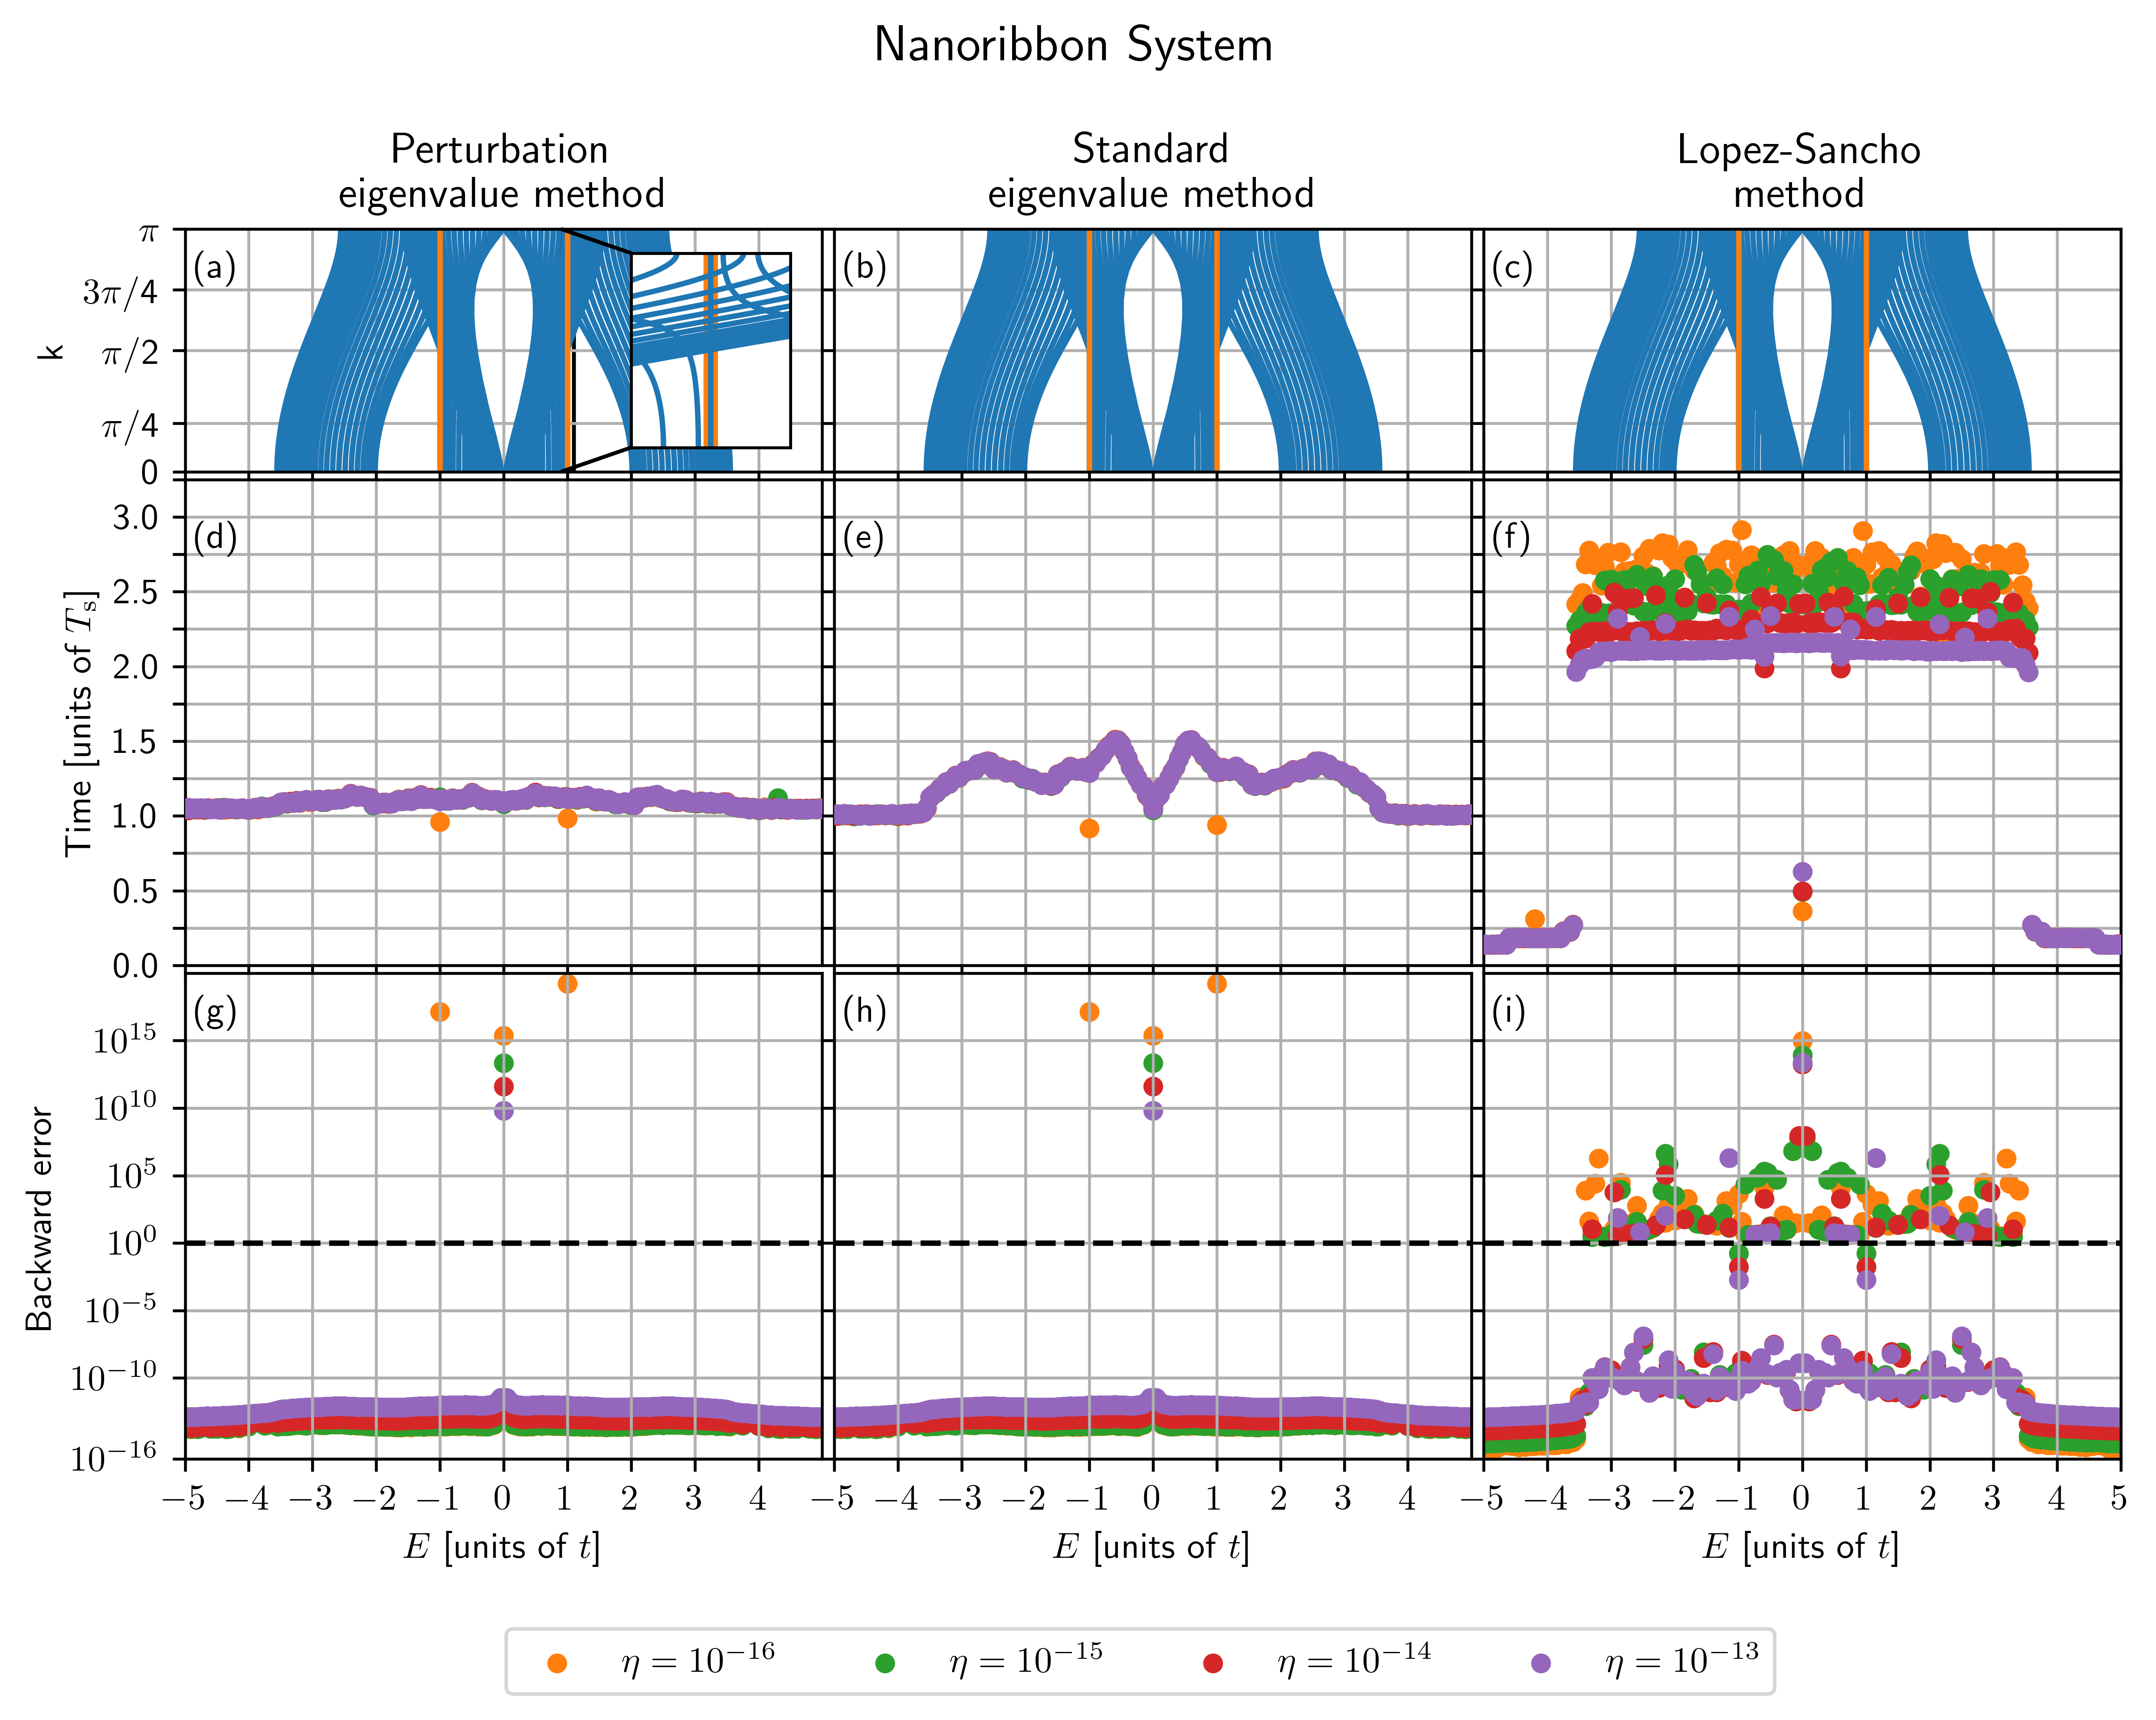

In [5]:
S='Nanoribbon'
k0=0
k1=np.pi
kticks=[0,0.2*np.pi,0.50*np.pi,0.75*np.pi,np.pi]
klabels=["0","$\pi$/4","$\pi$/2","$3\pi$/4","$\pi$"]
E0=-5
E1=5
N=98

lmethod="GESpert"
mmethod="GESstandard"
rmethod="LS"
plot_times(df,S,k0,k1,kticks,klabels,E0,E1,lmethod,mmethod,rmethod,4,14,inset2=True,padding=-0.3,plot_vline=True,tunit=True)